In [1]:
import numpy as np
import string
import operator
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
import random as r
%matplotlib inline

In [2]:
N=10
pop = 500
distance_matrix = np.zeros(shape=[N,N])
mu_rate = 0.01

In [3]:
words = string.ascii_uppercase
points = words[:N]

def get_coordinates(N):
    coordinates={}
    for i in range(N):
        coordinates[words[i]] = (np.random.randint(50),np.random.randint(50))
    return coordinates

coordinates = get_coordinates(N)

In [4]:
def setup_distance_matrix():
    
    #form the distance matrix
    for i in range(len(points)):
        for j in range(len(points)):
            distance_matrix[i][j] = calculate_distance(coordinates[points[i]],coordinates[points[j]])

def calculate_distance(t1,t2):
    x1 = t1[0]
    x2 = t2[0]
    y1 = t1[1]
    y2 = t2[1]
    return ((x2-x1)**2 + (y2-y1)**2)**0.5

def get_plot(route):
    a=[]
    b=[]
    for i in route:
        a.append(coordinates[i][0])
        b.append(coordinates[i][1])
    plt.plot(a,b,'b-o')
    plt.pause(0.0001)

def initialise():
    x=[]
    cities=[]
    for i in points:
        cities.append(i)
    for i in range(pop):
        r.shuffle(cities)
        x.append(''.join(cities))    
    return x

def route_distance(route):
    dist=0
    for i in range(len(route)-1):
        t1=coordinates[route[i]]
        t2=coordinates[route[i+1]]
        dist += calculate_distance(t1,t2)
    return dist

def f(x):
    y=[]
    for i in x:
        y.append(route_distance(i))
    return y

def get_mut(route):
    r_list=[]
    for i in route:
        r_list.append(i)
    
    for i in range(N):
        if np.random.rand() < mu_rate:   
            i1 = np.random.randint(N)
            i2 = np.random.randint(N)
            r_list[i1],r_list[i2] = r_list[i2],r_list[i1]
    return ''.join(r_list)

def mutation(x):
    for i in range(len(x)):
        x[i] = get_mut(x[i])
    return x

def get_cross(route):
    '''initial = route
    r_list=[]
    for i in route:
        r_list.append(i)
    r.shuffle(r_list)
    final = ''.join(r_list)
    
    if(route_distance(final)<route_distance(initial)):
        return final
    else:
        return initial'''
    
    

def crossover(x):
    for i in range(len(x)):
        new_route = ""
        route1 = x[np.random.randint(pop)]
        route2 = x[np.random.randint(pop)]
        a = np.random.randint(N)
        b = np.random.randint(N)
        start = min([a,b])
        end = max([a,b])
        new_route = route1[start:end]
        for j in route2:
            if j not in new_route:
                new_route = new_route+j
        x[i] = new_route
    return x

Generation 4552. Best route: CBEDHFIJGA, distance = 102.12592094714476


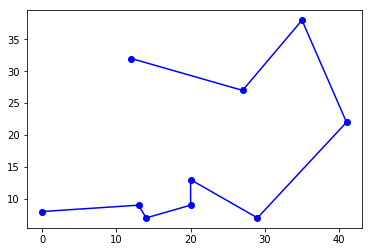

done


In [5]:
x = initialise()
y = f(x)
best_y = min(y)
best_route = x[operator.indexOf(y,best_y)]
best=[]
for i in range(5000):
    x = crossover(x)
    x = mutation(x)
    y = f(x)
    if min(y) < best_y:
        plt.clf()
        best_y = min(y)
        best_route = x[operator.indexOf(y,best_y)]
        best.append(best_y)
        clear_output()
        print(f"Generation {i+1}. Best route: {best_route}, distance = {best_y}")
        get_plot(best_route)
print("done")